# Rendering iPython notebooks

Since I'm a theoretical physicist that mainly works as a data analyst, I wanted a way to convey information both in text/formulas as well as in code. Usually the ideal way to do something like this are iPython notebooks. However, there was no direct way of rendering them.

Since github does render iPython notebooks when one clicks on them, I was certain that something like this should be possible. Not to mention that the Jupyter programs that are used to create these notebooks are browser based applications. So the first thing I did was a quick Google search. After a while I stumbled upon the following github repository: <a href="https://github.com/jsvine/notebookjs" target="_blank">notebook.js</a>. They even had a nice little demo that showed how the code could be used <a href="https://jsvine.github.io/nbpreview/" target="_blank">here</a>.

## The problems

Being impressed by the results, I wanted to utilize this code on my website. The main problem: I know nothing about JavaScript and how it works. Initially it looked pretty easy since I could in theory just re-use the code from the demo, right? Well, there is a huge problem there: The demo uses a button to open a local file. What I want on the other hand is to load a server-side file and render that.

That feels like it should be a simple problem to solve. I just need to figure out what kind of object the \<input\> returns and have to reconstruct that. However, since JavaScript is aimed at web applications opening files is not quite so simple, as you usually don't want to open random files from the web without user consent. Also, the kind of file returned by the \<input\> tag was not obvious to me.

Initially I read through many articles detailing how one loads a file in JavaScript. Since the concepts of 'promises' and other web-developer language are unknown to me it was often hard to filter what information was important to me and which wasn't. I found that in the old days one would usually use a `XMLHttpRequest` which should now be replaced by `fetch`. Once I knew that I tried multiple things but always ran into CORS-errors (cross-origin resource sharing). The problem where incorrectly configured headers. My problem on the other hand was that I had no idea how I could modify the headers of the http response and why that would be an issue with local files. Not knowing if the effort would even be worth it, I set the problem aside for another day. I wanted to publish the website sooner rather then later at the time and didn't think the feature would be critical.

## The solution

Between the years I had some time and so I returned to the problem. Although using `fetch` to retrieve files is encouraged nowadays, I found a solution to my problems with an `XMLHttpRequest`. So I stuck with that. The CORS-errors turned out to vanish, when not an absolute URL is used (e.g. `http://localhost/path/to/file`) but rather a relative path (e.g. path/to/file). This was more of a problem with my Jekyll/Liquid rather than with my (non-existent) JavaScript knowledge. It turns out I simply had to replace the Liquid code `{{ path/to/file | absolute_url }}` by `{{ path/to/file | relative_url }}`.

After being able to read the contents of a file via my JavaScript code as plain text, I had to find a solution to my second problem. I didn't know how to create the file-object that was used in the demo-script. So I returned to the documentation of the original repository and re-read it. Turns out it gave the solution right there. Once I had the plain text I could simply utilize the code that was provided for browser-based usage in the repository:
```javascript
var notebook = nb.parse(JSON.parse(raw_ipynb_json_string));
var rendered = notebook.render();
document.body.appendChild(rendered);
```

My next problem wasn't stated yet: I wanted to be able to write some HTML code and insert notebooks as div's. I also wanted to be able to insert multiple notebooks into the same document and I wanted to only have to give the path to the notebook as an attribute in the \<div\>-tag. Here, the demo-code came in very useful. It used the `document.querySelector` function to grab the div into which the code should be inserted. After some searching, I found that there was also a function called `document.querySelectorAll` where one can search for all elements with a given attribute. For me this attribute is the class called `notebook`. To access attributes, a friend of mine who works in web-development suggested the use of `data-` attributes. So now the code loops over every element in the HTML code that has a class called `notebook` and loads the file specified by the attribute `nb-path`. The file is then rendered by the above code. I also make use of some code in the demo that removes any acces child that may have been placed by accident and appends the rendered notebook.

I wanted the notebook to be visible immediately when the page is loaded. So I searched for how to call a JavaScript function when the page is done loading, to append the notebook. This can be accieved by using the `onload` attribute of the body and setting it equal to the function.

The demo also showed how to render math expressions and syntax-highlighting. So I included the remaining files from the demo and tried again. It worked flawlessly with the exception of the math font. There was an error there, which I resolved by including an online version of the font.

Finally, I had to include some CSS to style the notebook markdown. This is simple enough and can be done by setting attributes e.g. for `.notebook h1 {}` (which would style the \<h1\>-tag of any notebooks). I also noticed that the markdown wasn't parsed correctly. This was solved by changing the order in which the different scripts are loaded.

## Results

After having set all of that up, the website is now capable of displaying iPython notebooks. In fact most of this web-page is rendered from an iPython notebook. To demonstrate we can plot some simple sine function.

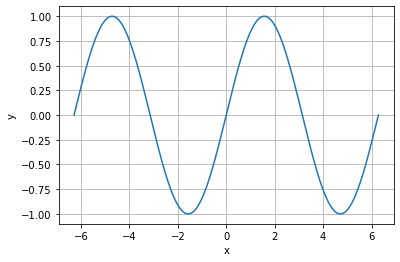

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()